In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Mubasshira\\Downloads\\marketing_campaign.csv", sep="\t")
print(f"Shape of date: {df.shape}")
df.tail()

Shape of date: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [3]:
df.isnull().sum()/ len(df) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

# Data Cleaning

In [4]:
df = df.dropna()
df.drop(columns=['ID','Z_CostContact','Z_Revenue'], inplace=True)

In [5]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [6]:
data = df.copy()

In [7]:
#data.to_csv("data.csv")

In [8]:
#Bith_year
def age_calculator(Cur_year, birth_year):
    age = Cur_year - birth_year
    return age

Cur_year = 2024
data['Age'] = data['Year_Birth'].apply(lambda birth_year: age_calculator(Cur_year, birth_year))

#Education
education_mapping = {
    '2n Cycle': 'UG',
    'Basic': 'UG',
    'Graduation': 'G',
    'PhD': 'PG',
    'Master': 'PG'
}

data['Education'].replace(education_mapping, inplace=True)

#Marital_Status
marital_status_mapping = {
    'Married': 'Partner',
    'Together': 'Partner',
    'Single' : 'Alone',
    'Divorced':'Alone',
    'Widow': 'Alone',
    'Alone': 'Alone',
    'Absurd':'Alone',
    'YOLO': 'Alone'
}

data['Marital_Status'].replace(marital_status_mapping, inplace=True)

#Income
data['Income'] = data['Income'].astype(int)

#Children = Kidhome + Teenhome
data['Childrens'] = data['Kidhome'] + data['Teenhome']

#Total Amt Spent = Sum(MNT's)
data['TotalMntSpent'] = data[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [9]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Childrens,TotalMntSpent
0,1957,G,Alone,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,0,1617
1,1954,G,Alone,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,2,27
2,1965,G,Partner,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,0,776
3,1984,G,Partner,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,1,53
4,1981,PG,Partner,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,1,422


# Data Visualization

**Income Distribution**

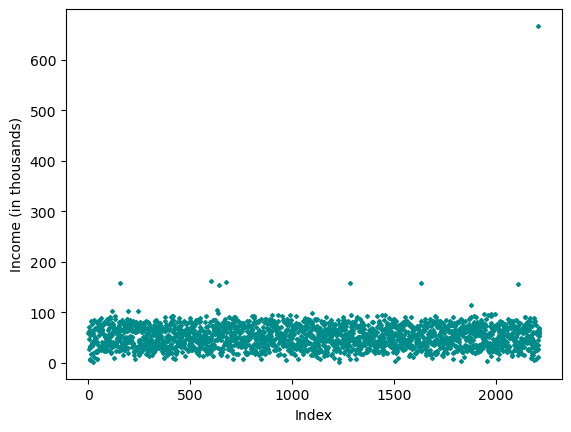

In [10]:
income_data = data['Income']
income_div = income_data / 1000
plt.scatter(range(len(income_div)), income_div, marker='D', s = 4, c = 'darkcyan')
plt.xlabel('Index')
plt.ylabel('Income (in thousands)')
plt.show()

*The vast majority of income falls within the range of 1000 to 100,000, accounting for approximately 90% of the income distribution. However, there is an outlier observed for incomes exceeding 600,000.*

*We will exclude income values greater than 200,000 since all other income values are below this threshold, except for one outlier at 666,666.*

In [11]:
income_greater_than_200000 = data[data['Income'] >= 200000].index
data.drop(income_greater_than_200000, inplace=True)

**Education Level Distribution**

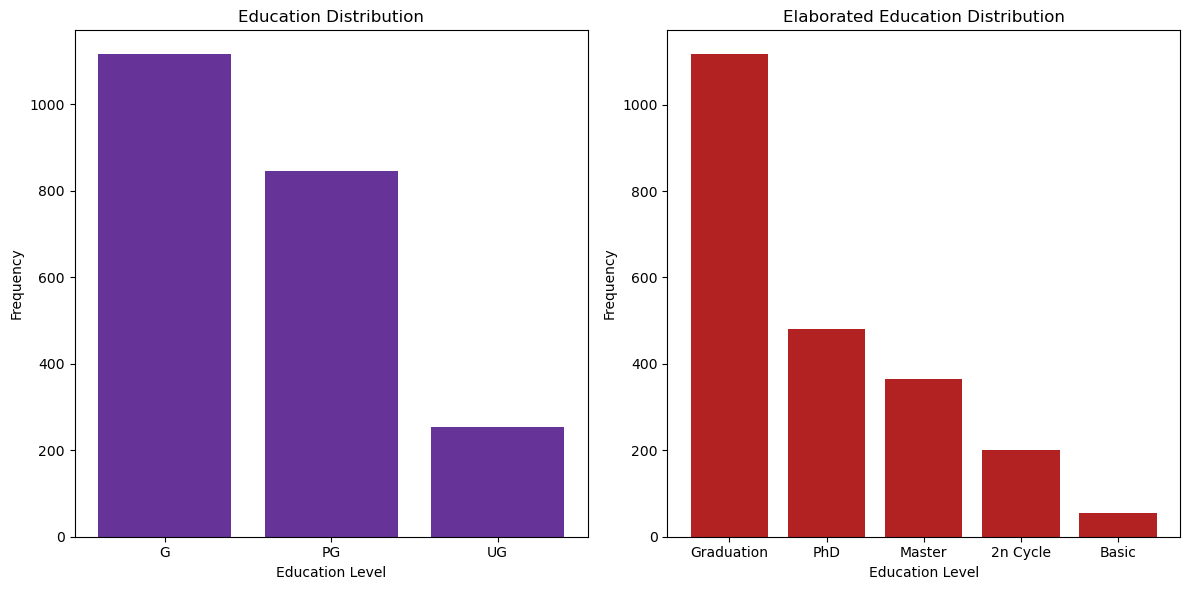

In [12]:
education_dist = data['Education'].value_counts()
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(education_dist.index, education_dist.values, color='rebeccapurple')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

elaborated_dist = df['Education'].value_counts()
plt.subplot(1,2,2)
plt.bar(elaborated_dist.index, elaborated_dist.values, color = 'firebrick')
plt.title('Elaborated Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

*Graduates outnumber postgraduates, with fewer individuals having completed undergraduate studies. Moreover, the majority of customers ceased their education after attaining a graduate degree.*

**Marital Status Distribution**

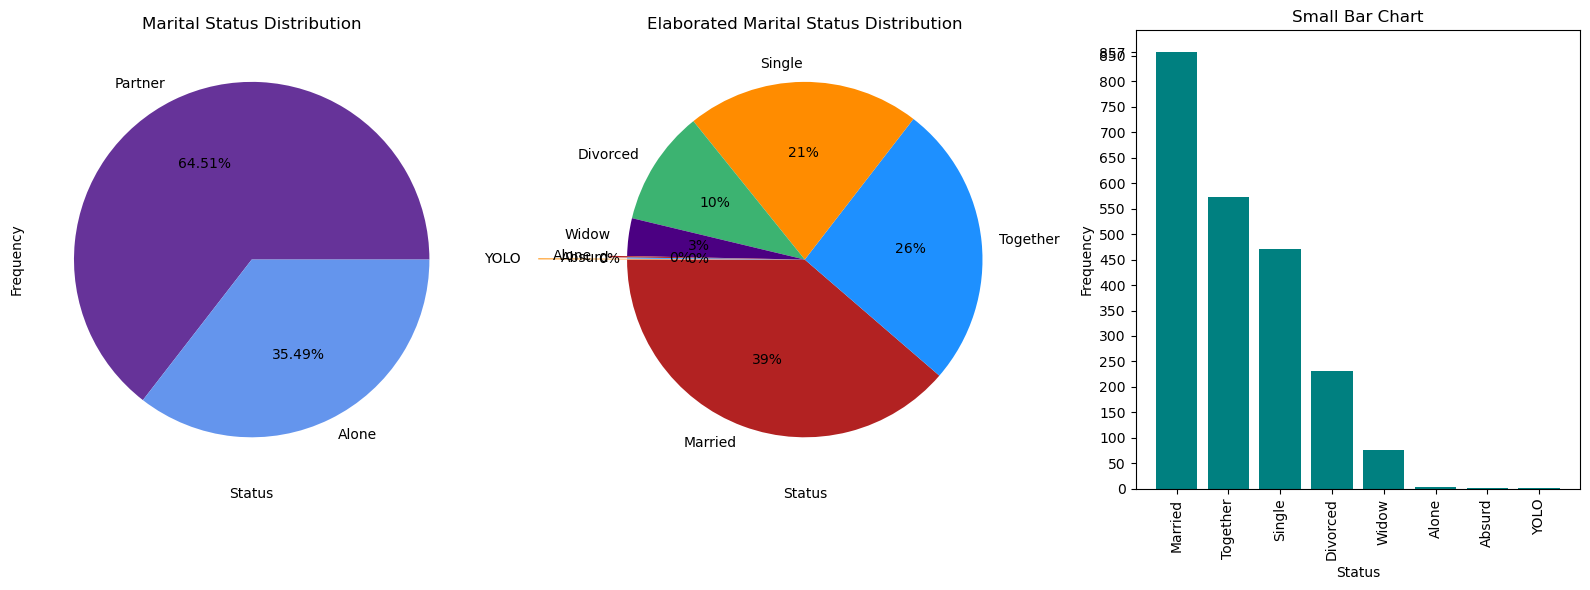

In [13]:
maritalst_dist = data['Marital_Status'].value_counts()
plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
plt.pie(maritalst_dist.values, labels=maritalst_dist.index,startangle=0, autopct="%.2f%%", colors=['rebeccapurple', 'cornflowerblue', 'lightcoral', 'khaki', 'mediumorchid', 'lightseagreen', 'lightpink'])
plt.title('Marital Status Distribution')
plt.xlabel('Status')
plt.ylabel('Frequency')

elaboratedst_dist = df['Marital_Status'].value_counts()
explode = [0,0,0,0,0,0.1,0,0.5]
plt.subplot(1,3,2)
plt.pie(elaboratedst_dist.values, labels=elaboratedst_dist.index,startangle=180,autopct="%.f%%", explode=explode, colors=['firebrick', 'dodgerblue', 'darkorange', 'mediumseagreen', 'indigo'])
plt.title('Elaborated Marital Status Distribution')
plt.xlabel('Status')

plt.subplot(1, 3, 3)
max_freq = max(elaboratedst_dist.values)
y_ticks = list(range(0, max_freq + 1, 50)) + [max_freq]
plt.bar(elaboratedst_dist.index, elaboratedst_dist.values, color='teal')
plt.title('Small Bar Chart')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.yticks(y_ticks)
plt.tight_layout()
plt.show()

*The data suggests that the majority of customers fall into the "married" category, while a very small percentage, less than 1%, are categorized as "YOLO," "widow," "absurd," or "alone." Therefore, for customer segmentation purposes, the target audience primarily comprises those classified as "married," "together," or "single."*

**Age Distribution**

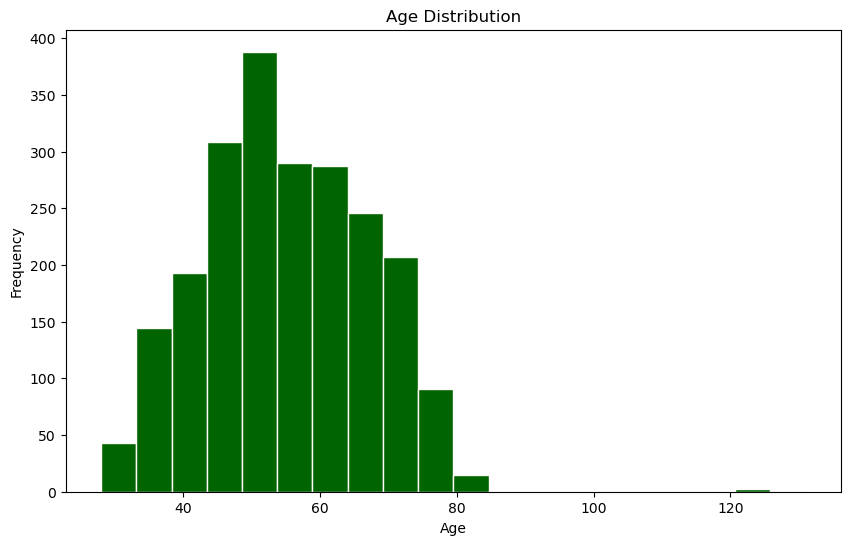

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='darkgreen', edgecolor='snow')  
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*The majority of customers fall within the age range of 40 to 70. Additionally, there is an instance of age exceeding 120, which stands out as noteworthy however we will be excluding that row since it is indicated as an outlier .*

In [15]:
age_greater_than_100 = data[data['Age']>=100].index
data.drop(age_greater_than_100, inplace=True)

**Total Amount Spent Distribution**

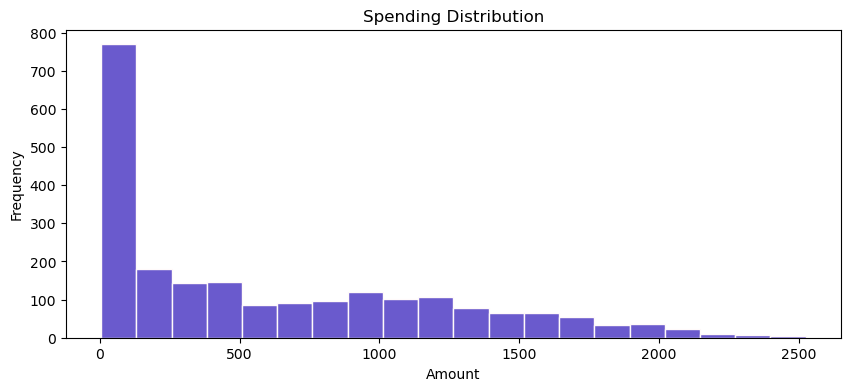

In [16]:
plt.figure(figsize=(10, 4))
plt.hist(data['TotalMntSpent'], bins=20, color='slateblue', edgecolor='snow') 
plt.title('Spending Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

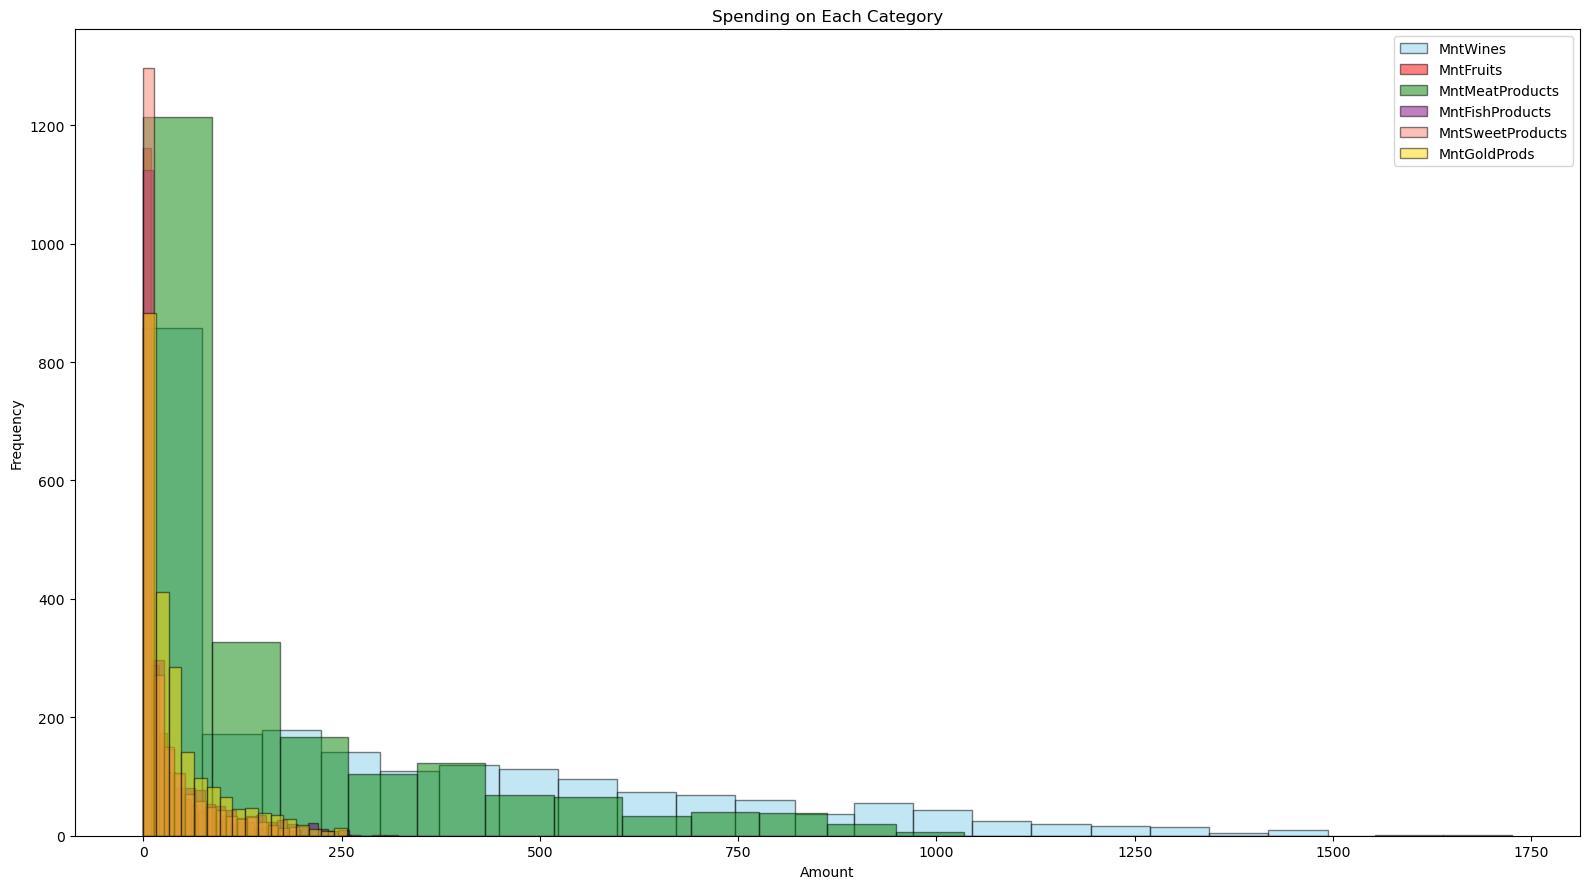

In [17]:
plt.figure(figsize=(16,9))
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
colors = ['skyblue', 'red', 'green', 'purple', 'salmon', 'gold']

for i, category in enumerate(categories):
    plt.hist(data[category], bins=20, color=colors[i], alpha=0.5, label=category, edgecolor='black')

plt.title('Spending on Each Category')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

*The data reveals that a significant portion of expenditure is allocated towards meat and wine purchases. It's noteworthy that wine purchases outweigh those of fruits, despite the latter being associated with health benefits.*

**Purchasing Behavior**

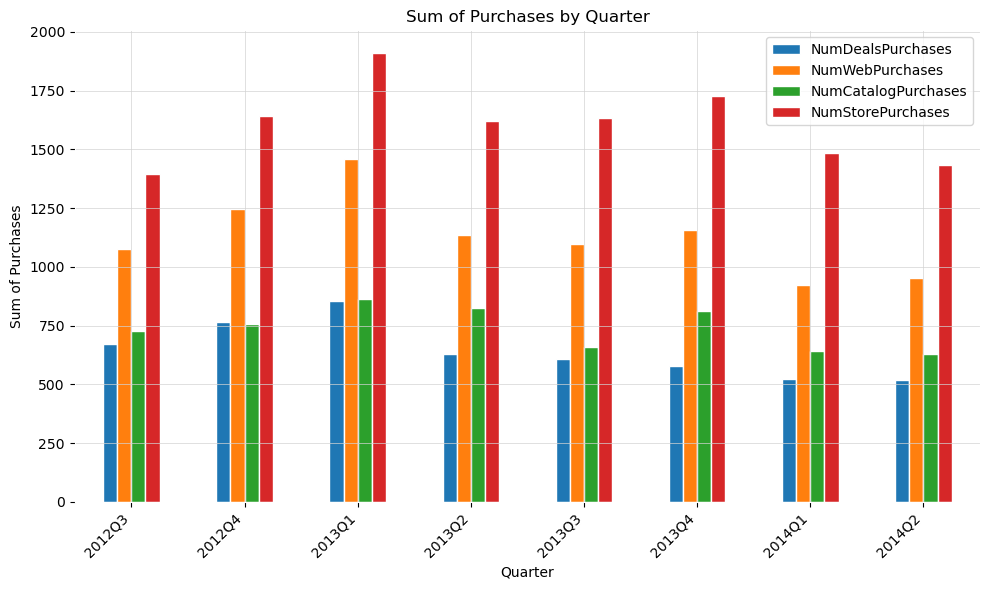

In [18]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

data['Quarter'] = data['Dt_Customer'].dt.to_period('Q')
required_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
quarterly_data = data.groupby('Quarter')[required_columns].sum()

fig, ax = plt.subplots(figsize=(10, 6))
quarterly_data.plot(kind='bar', ax=ax, edgecolor='white')
ax.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.set_xticklabels([str(q) for q in quarterly_data.index], rotation=45, ha='right')
plt.xlabel('Quarter')
plt.ylabel('Sum of Purchases')
plt.title('Sum of Purchases by Quarter')
plt.tight_layout()
plt.show()

*The dominance of store purchases across all quarters suggests a preference for in-person transactions over other types of purchases, such as online or catalog purchases.*

**Accepted Campaigns**

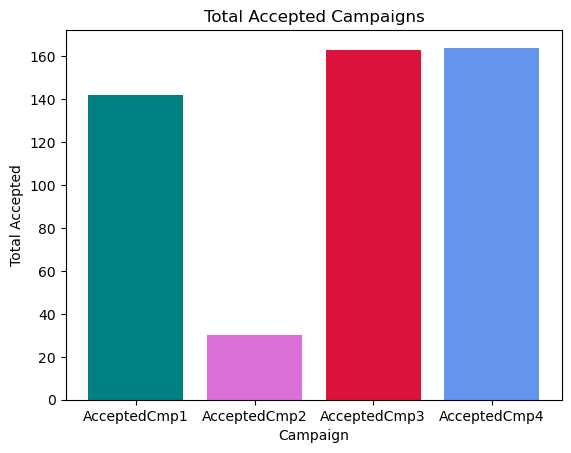

In [19]:
accepted_campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4']
sum_accepted_campaigns = [data[campaign].sum() for campaign in accepted_campaigns]
plt.bar(accepted_campaigns, sum_accepted_campaigns, color=['teal', 'orchid', 'crimson', 'cornflowerblue'])
plt.xlabel('Campaign')
plt.ylabel('Total Accepted')
plt.title('Total Accepted Campaigns')
plt.show()

**Number of Children Distribution**

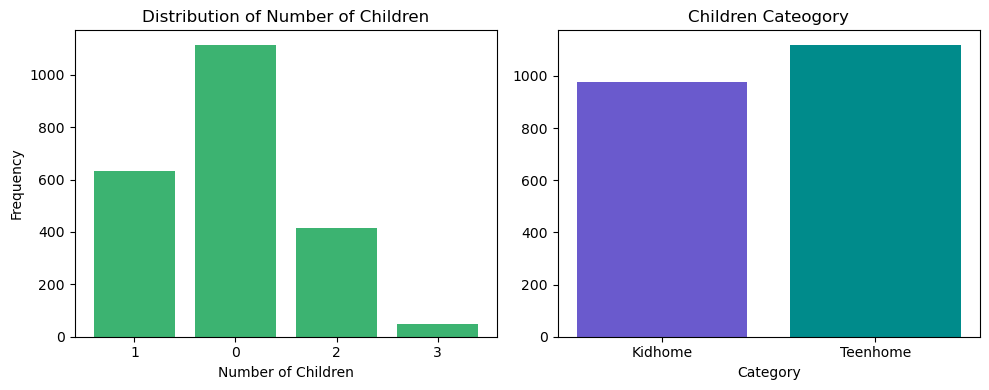

In [20]:
no_of_childrens = data['Childrens'].value_counts()
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.bar(no_of_childrens.index, no_of_childrens.values, color='mediumseagreen') 
plt.title('Distribution of Number of Children')
plt.ylabel('Frequency')
plt.xlabel('Number of Children')
plt.xticks(range(len(no_of_childrens.index)), [int(x) for x in no_of_childrens.index])

plt.subplot(1,2,2)
child_categories = ['Kidhome', 'Teenhome']
total_accepted = [data[category].sum() for category in child_categories]
plt.bar(child_categories, total_accepted, color=['slateblue', 'darkcyan'])
plt.xlabel('Category')
plt.title('Children Cateogory')

plt.tight_layout()
plt.show()

*Out of all customers, a fraction of 600 customers have one child at home, indicating that the majority of customers are without children. Among those with children, there is a subtle distinction in the ratio of customers with a child in the "kid" category compared to those in the "teen" category.*

In [21]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Childrens,TotalMntSpent,Quarter
0,1957,G,Alone,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,0,1617,2012Q3
1,1954,G,Alone,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,2,27,2014Q1
2,1965,G,Partner,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,0,776,2013Q3
3,1984,G,Partner,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,1,53,2014Q1
4,1981,PG,Partner,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,1,422,2014Q1


In [22]:
num_features = data.select_dtypes(exclude=['O', 'period[Q-DEC]']).keys()

<Axes: >

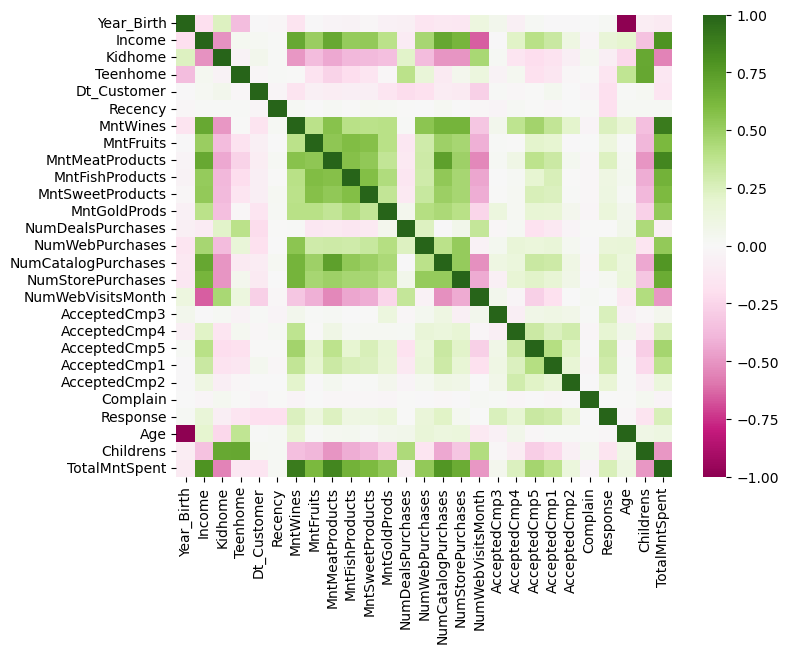

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(data[num_features].corr(), cmap='PiYG',)

- Here's What we can understand from the Graph :-


i) Year_Birth and Age: There's a perfect negative correlation (-1.0) between these two variables, which is expected since Age is derived from Year_Birth. This means as the Year_Birth increases, Age decreases, and vice versa.

ii) Income and TotalMntSpent: There's a relatively strong positive correlation (0.67) between Income and TotalMntSpent, indicating that customers with higher incomes tend to spend more.

iii) Kidhome and Teenhome: There's a moderate positive correlation (0.69) between the number of children at home (Kidhome) and the number of teenagers at home (Teenhome). This suggests that households with more children tend to have more teenagers as well.

iv) MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds: These variables, representing the amount spent on different product categories, show moderate to strong positive correlations with each other. Customers who spend more on one product category tend to spend more on others as well.

v) NumStorePurchases and NumCatalogPurchases: These variables have a relatively strong positive correlation (0.68), indicating that customers who make more purchases in stores also tend to make more purchases from catalogs.

vi) NumWebVisitsMonth and Response: There's a slight positive correlation (0.26) between the number of web visits per month and the response to marketing campaigns. This suggests that customers who visit the website more frequently might be more responsive to marketing efforts.

vii) Age and Childrens: There's a moderate negative correlation (-0.5) between Age and the number of children at home, indicating that older customers are less likely to have children at home.

viii) Income and Kidhome, Teenhome: There are negative correlations between Income and the number of children at home (Kidhome) and teenagers at home (Teenhome). This suggests that households with higher incomes tend to have fewer children and teenagers at home.

# Data Preprocessing

In [24]:
cat_features = data.select_dtypes(include='O').keys()
cat_features

Index(['Education', 'Marital_Status'], dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[['Education', 'Marital_Status']] = data[['Education', 'Marital_Status']].apply(le.fit_transform)

**We no longer need the Dt_Customer, Quarter and Year_Birth columns, hence dropping it**

In [26]:
data.drop(columns=['Quarter', 'Dt_Customer','Year_Birth'], inplace=True)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Convert the standardized data back to a DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=data.columns)

In [28]:
data_standardized.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Childrens,TotalMntSpent
0,-0.893586,-1.349603,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,2.375425,1.018352,-1.264598,1.676245
1,-0.893586,-1.349603,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,1.274785,1.404572,-0.963297
2,-0.893586,0.740959,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,0.334530,-1.264598,0.280110
3,-0.893586,0.740959,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.289547,0.069987,-0.920135
4,0.571657,0.740959,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.282048,-0.282981,-0.280175,-0.261914,-0.117256,-0.09552,-0.420977,-1.033114,0.069987,-0.307562


# PCA

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data_standardized)
PCA_data = pd.DataFrame(pca.transform(data_standardized), columns=(["PC1", "PC2", "PC3"]))
PCA_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2212.0,1.156399e-16,2.826769,-5.522382,-2.531478,-0.810939,2.308865,8.464253
PC2,2212.0,6.424437e-18,1.527871,-3.109341,-1.326667,-0.159509,1.107336,5.431308
PC3,2212.0,-1.766720e-17,1.384147,-3.194394,-0.721196,-0.152225,0.276290,8.632197


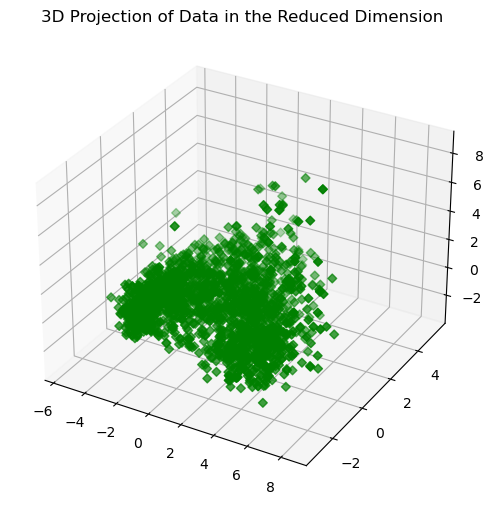

In [30]:
# Extracting principal components
x = PCA_data["PC1"]
y = PCA_data["PC2"]
z = PCA_data["PC3"]

# Plotting in 3D
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="green", marker="D")
ax.set_title("3D Projection of Data in the Reduced Dimension")
plt.show()


# Optimal Number of Clusters Determination using Elbow Method with KMeans Clustering

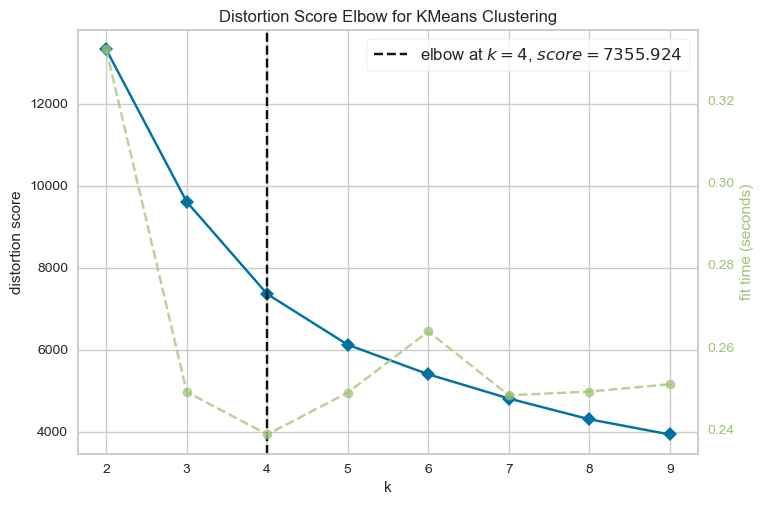

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(PCA_data)
visualizer.show()

**Based on this analysis, we have determined that 4 clusters provide the optimal fit for our data. Therefore, we have identified the most suitable clustering solution.**

# Agglomerative Clustering with Ward Linkage

In [32]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 4
agg_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_model.fit(PCA_data)
agg_labels = agg_model.labels_
PCA_data['Clusters'] = agg_labels
data['Clusters'] = agg_labels
print("Agglomerative Clustering Labels:")
print(agg_labels)

Agglomerative Clustering Labels:
[1 0 1 ... 1 1 0]


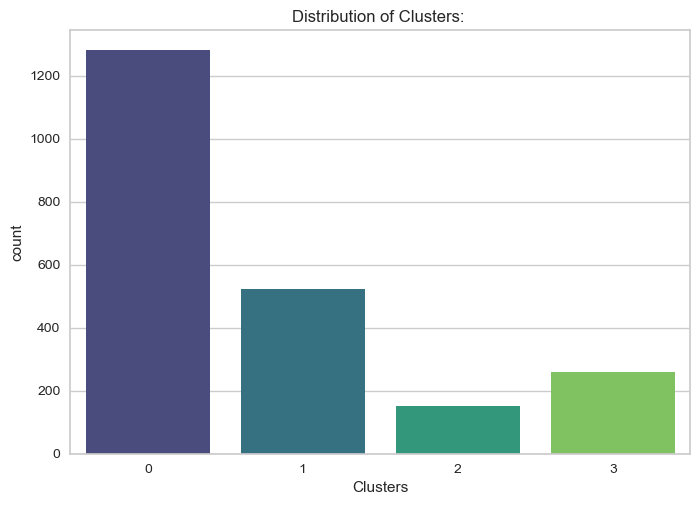

In [33]:
sns.countplot(x=data['Clusters'], palette='viridis')
plt.title("Distribution of Clusters: ")
plt.show()

In [34]:
PCA_data['Clusters'].value_counts()

Clusters
0    1280
1     522
3     259
2     151
Name: count, dtype: int64

*having clusters of different sizes is a common outcome in clustering analysis*

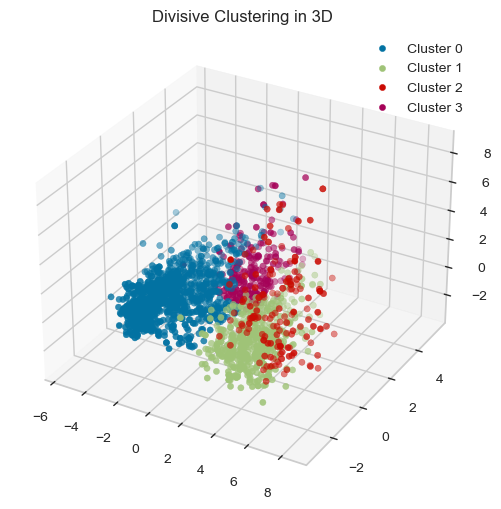

In [35]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111, projection='3d')

# Extracting principal components
x = PCA_data['PC1']
y = PCA_data['PC2']
z = PCA_data['PC3']

# Plotting each cluster separately
for cluster_label in np.unique(agg_labels):
    cluster_indices = agg_labels == cluster_label
    ax.scatter(x[cluster_indices], y[cluster_indices], z[cluster_indices], label=f'Cluster {cluster_label}')

ax.set_title('Divisive Clustering in 3D')
ax.legend()
plt.show()

In [36]:
data.to_csv('data1.csv')

Text(0.5, 1.0, 'Clusters based on Total amount Spent and Income')

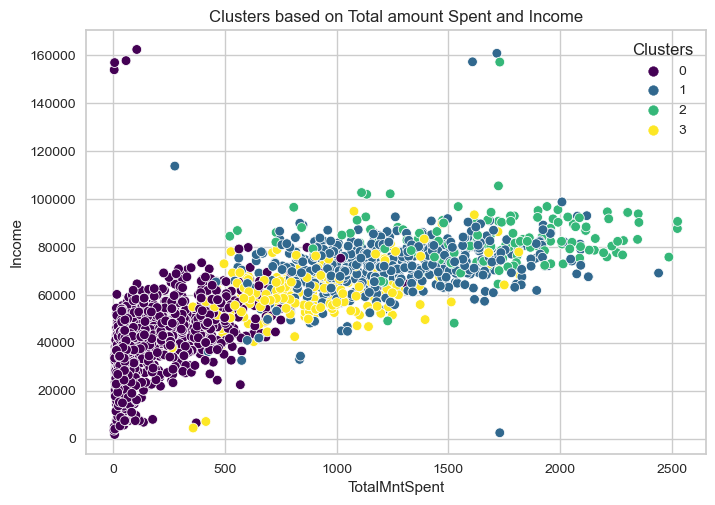

In [37]:
sns.scatterplot(x=data['TotalMntSpent'], y =data['Income'], hue=data['Clusters'], palette='viridis')
plt.title("Clusters based on Total amount Spent and Income")

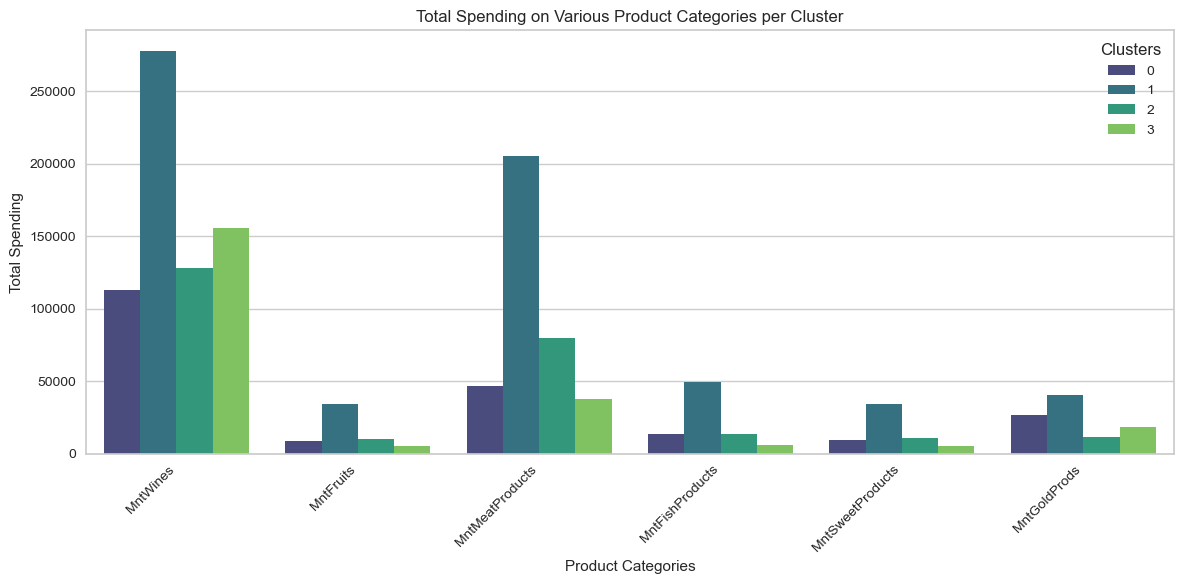

In [38]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cluster_totals = data.groupby('Clusters')[products].sum().reset_index()
melted_data = cluster_totals.melt(id_vars='Clusters', var_name='Product', value_name='Total Spending')
melted_data = melted_data.merge(data[['Clusters', 'Income']], on='Clusters')

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='Product', y='Total Spending', hue='Clusters', palette='viridis')
plt.title("Total Spending on Various Product Categories per Cluster")
plt.xlabel("Product Categories")
plt.ylabel("Total Spending")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Cluster 1 and 2 show a higher concentration of customers in the wines category, suggesting that efforts should be directed towards catering to their preferences. However, the fruits category lacks significant patronage from any particular cluster.*

*Cluster 1 dominates in the meat category, indicating a potential market segment to target. On the other hand, clusters exhibit less interest in fish, sweets, and gold products compared to fruits.*

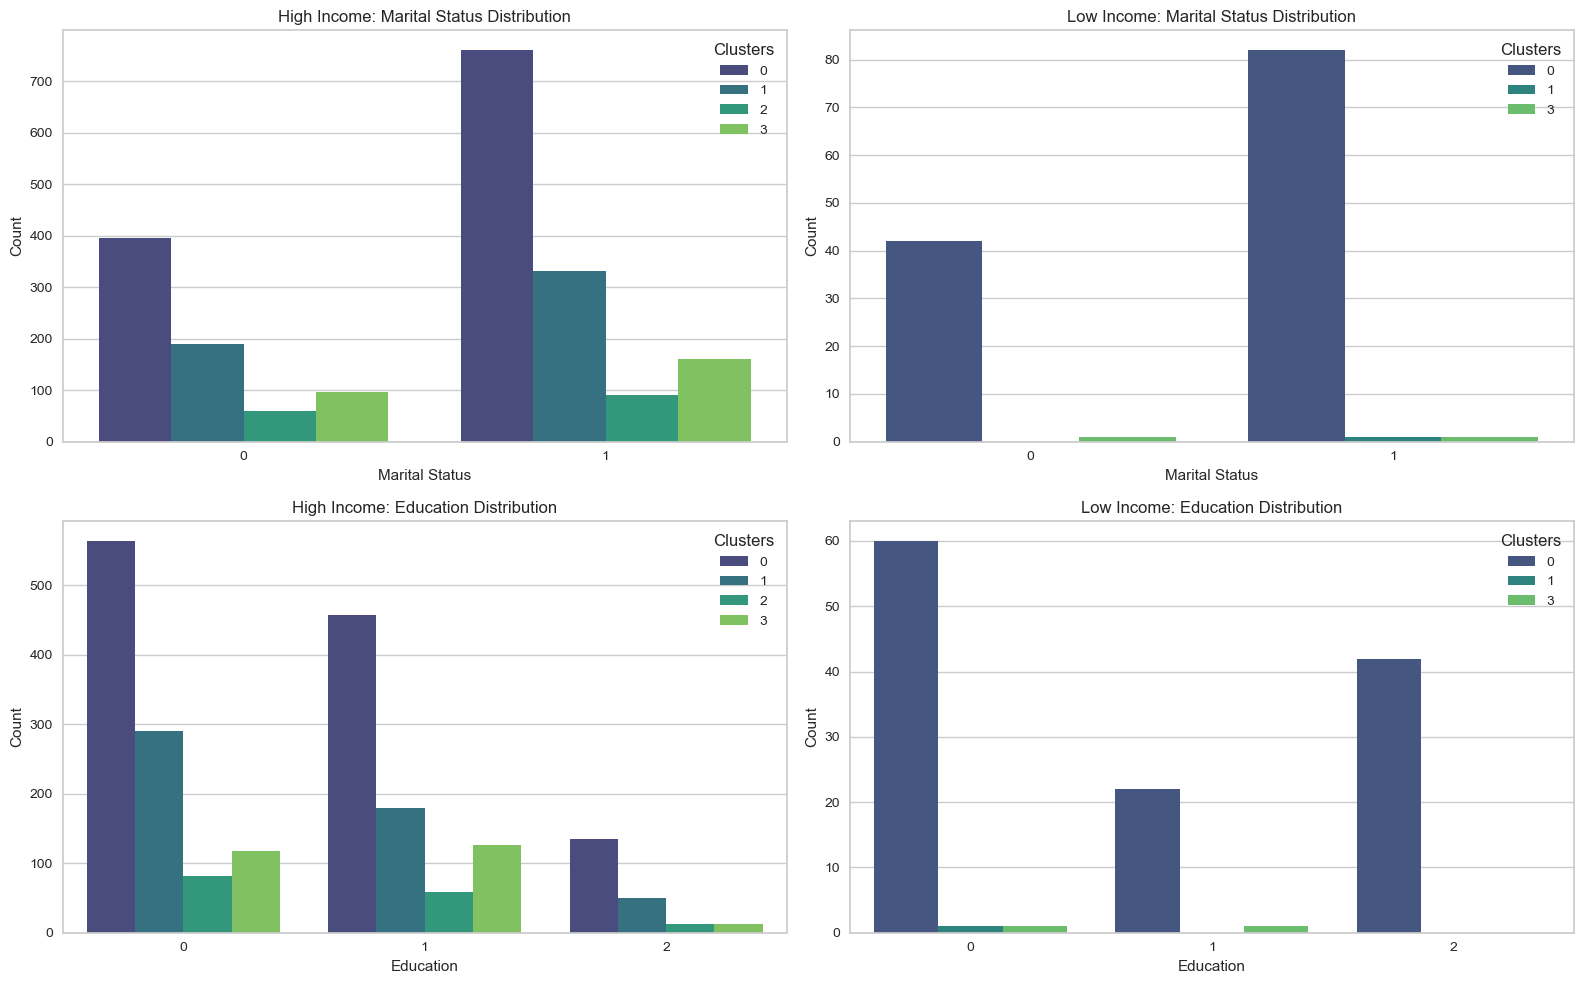

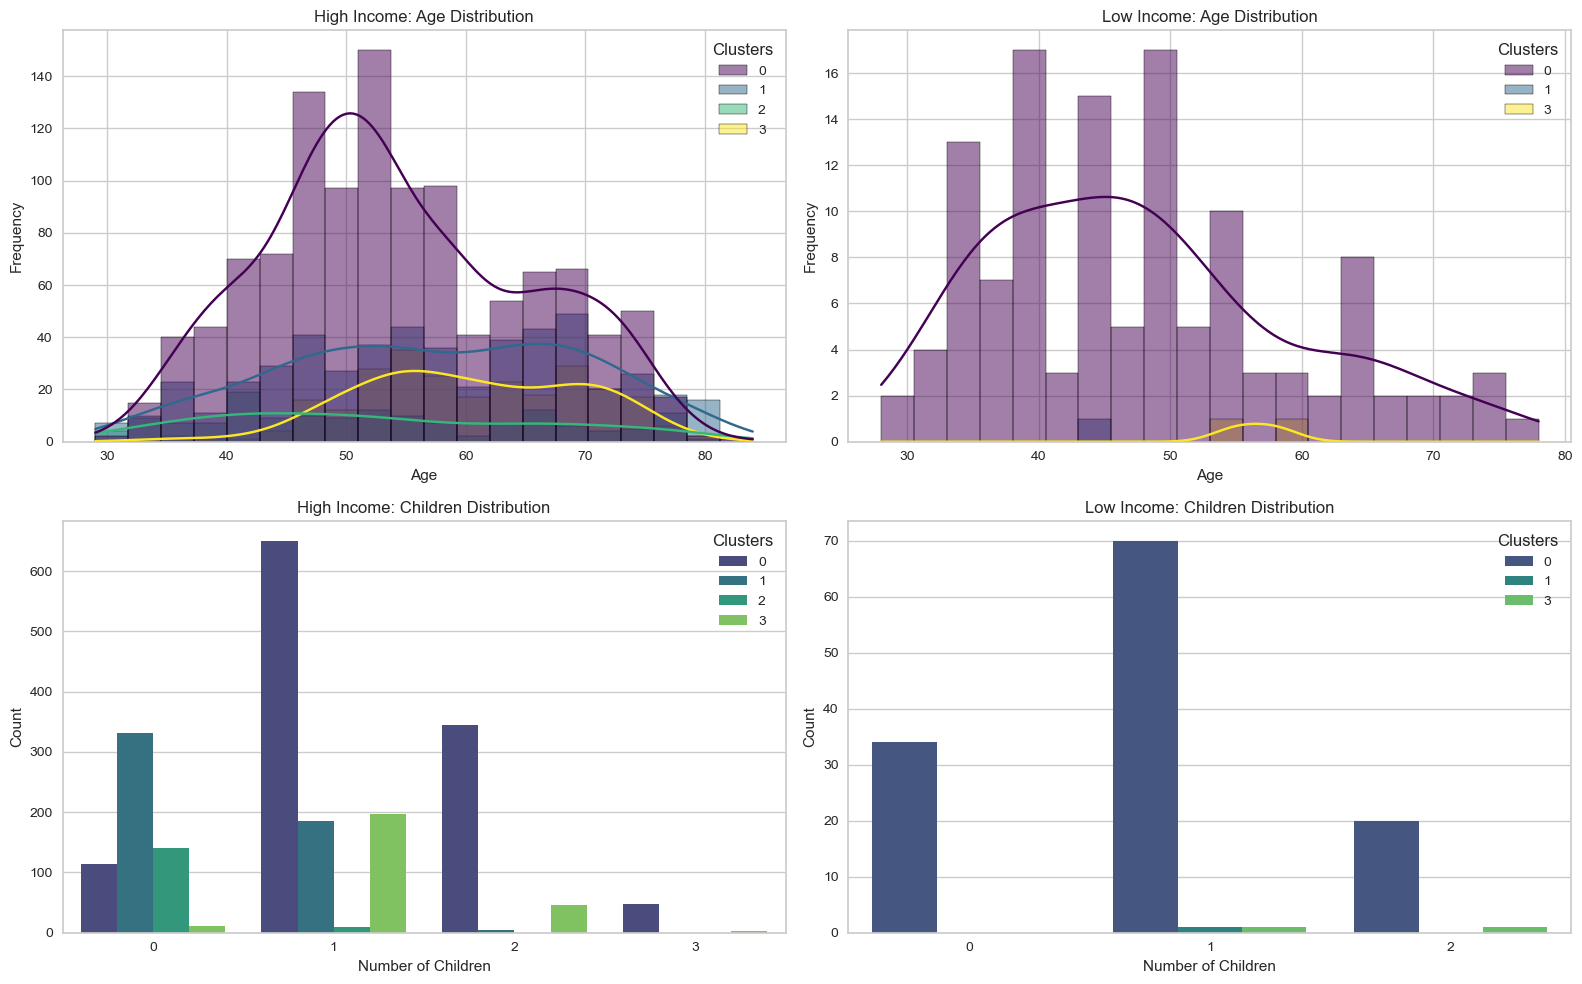

In [39]:
# Setting a threshold
threshold = 20000
high_income_customers = data[data['Income'] >= threshold]
low_income_customers = data[data['Income'] < threshold]

plt.figure(figsize=(16, 10))
# High-income Marital Status
plt.subplot(2, 2, 1)
sns.countplot(x='Marital_Status', data=high_income_customers, hue='Clusters', palette='viridis')
plt.title('High Income: Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Low-income Marital Status
plt.subplot(2, 2, 2)
sns.countplot(x='Marital_Status', data=low_income_customers, hue='Clusters', palette='viridis')
plt.title('Low Income: Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# High-income Education
plt.subplot(2, 2, 3)
sns.countplot(x='Education', data=high_income_customers, hue='Clusters', palette='viridis')
plt.title('High Income: Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')

# Low-income Education
plt.subplot(2, 2, 4)
sns.countplot(x='Education', data=low_income_customers, hue='Clusters', palette='viridis')
plt.title('Low Income: Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
# High-income Age
plt.subplot(2, 2, 1)
sns.histplot(high_income_customers, x='Age', hue='Clusters', bins=20, kde=True, palette='viridis')
plt.title('High Income: Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Low-income Age
plt.subplot(2, 2, 2)
sns.histplot(low_income_customers, x='Age', hue='Clusters', bins=20, kde=True, palette='viridis')
plt.title('Low Income: Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# High-income Children
plt.subplot(2, 2, 3)
sns.countplot(x='Childrens', data=high_income_customers, hue='Clusters', palette='viridis')
plt.title('High Income: Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')

# Low-income Children
plt.subplot(2, 2, 4)
sns.countplot(x='Childrens', data=low_income_customers, hue='Clusters', palette='viridis')
plt.title('Low Income: Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

INSIGHTS:

- Marital Status: High-income customers predominantly have a partner, while low-income customers in cluster 1 also tend to have partners.

- Education: High-income customers are primarily graduates with a high number of post-graduates, while undergraduates are less represented. Low-income cluster 1 customers are mostly graduates, followed by undergraduates and then post-graduates.

- Age: Among high-income customers, those in cluster 1 are typically in the age range of 40-60 years, indicating a mature demographic. 

- Children: High-income customers, especially in cluster 0, often have one child, followed by a significant portion having no children. In contrast, for low-income customers in cluster 1, having more than one child is more prevalent.

**How many deals, web purchases, catalog purchases, and store purchases does the customer make?**

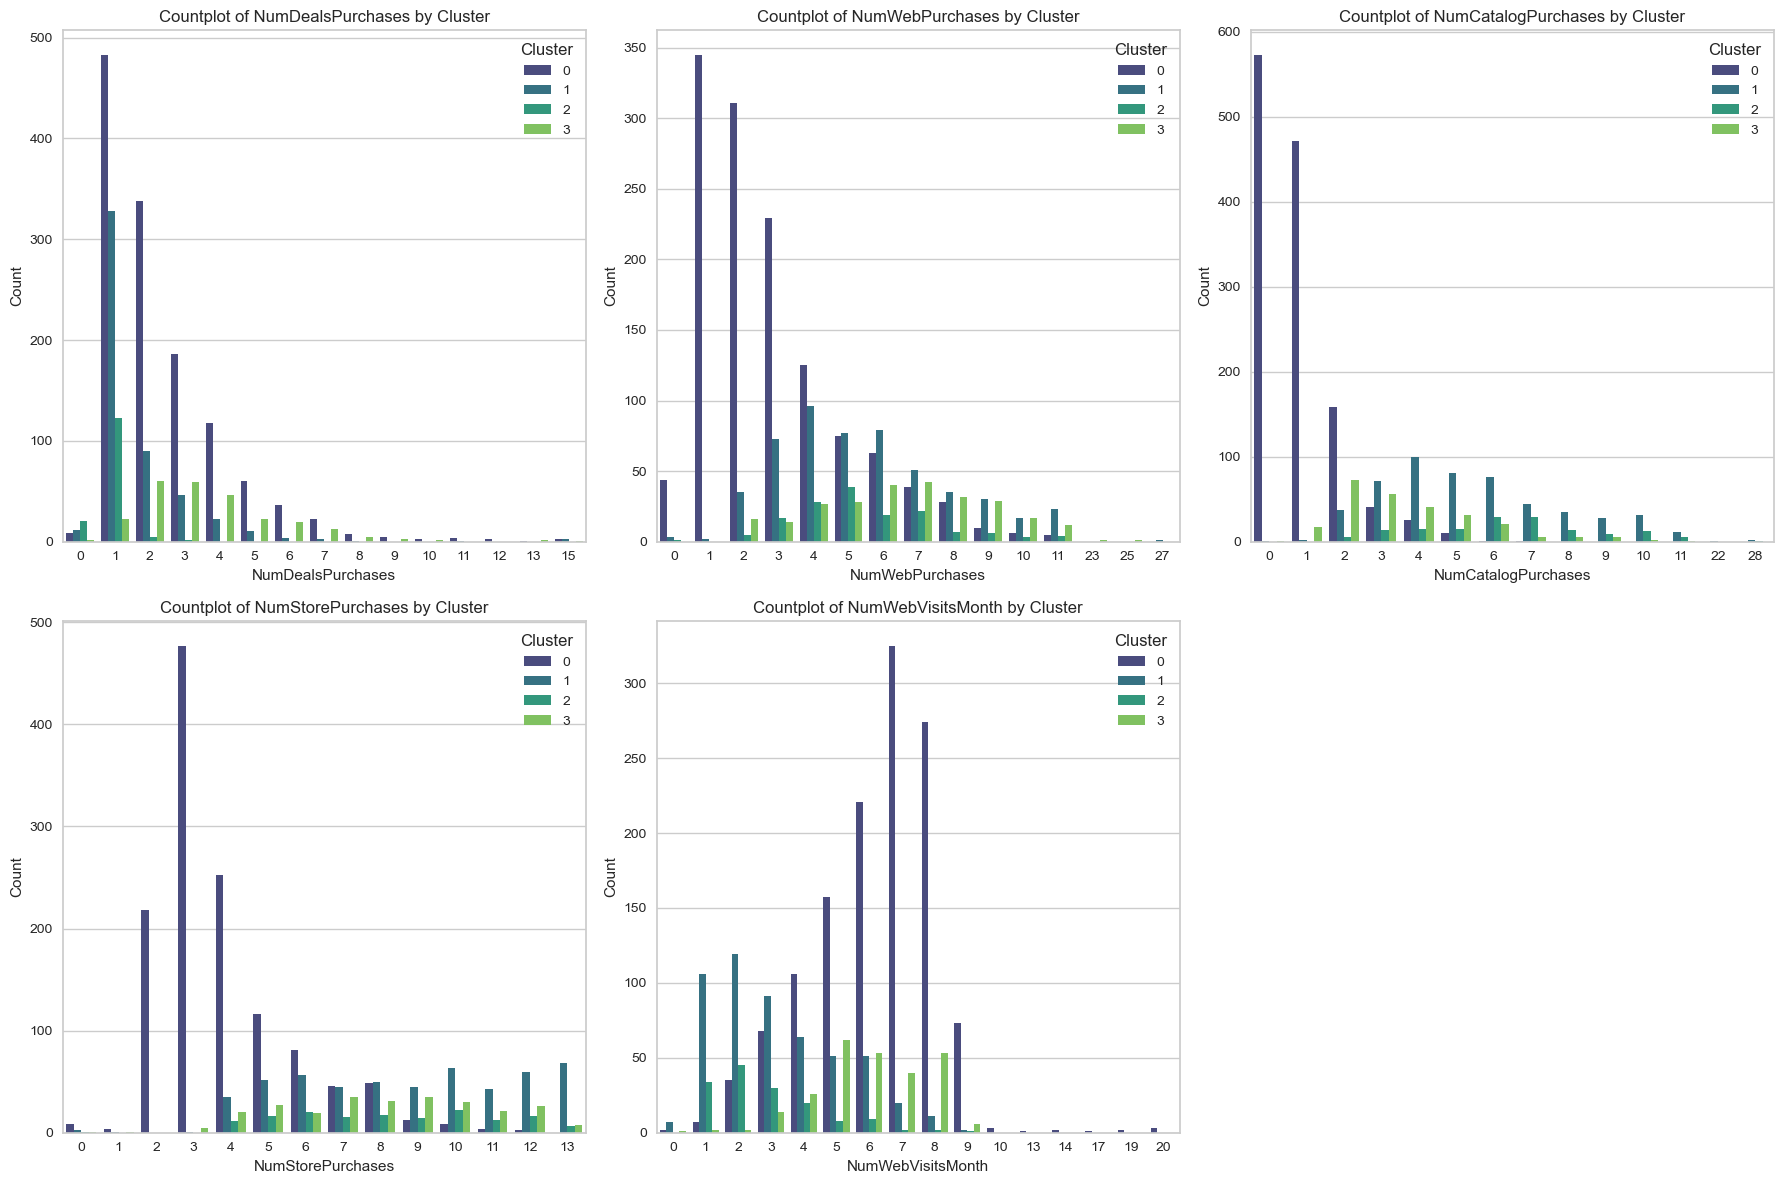

In [40]:
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
num_cols = 3
num_rows = (len(purchase_columns) - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))
#flattening
axes = axes.flatten()
for i, column in enumerate(purchase_columns):
    sns.countplot(data=data, x=column, hue='Clusters', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Countplot of {column} by Cluster')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Cluster', loc='upper right')
for j in range(len(purchase_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Insights:

- Deals Purchases: Cluster 1 leads with over 400 purchases, followed closely by Cluster 2 with approximately 420 transactions.
- Web Purchases: Both Clusters 0 and 1 exhibit a strong preference for web purchases, indicating a higher inclination towards online shopping.
- Catalog Purchases: Although Cluster 1 has the highest count in catalog purchases, customers in this cluster typically make only 1 or 2 purchases each. In contrast, Cluster 0 consistently engages in catalog purchases across all available numbers.
- Store Purchases: Similar to catalog purchases, Cluster 0 also demonstrates consistent engagement in store purchases across various numbers.
- Web Visits per Month: The trend is reversed here, with Cluster 0 showing higher counts compared to Cluster 1. Additionally, Cluster 1 exhibits an increasing trend in purchases, peaking at around 7 visits per month.

**Campaign Acceptance distribution**

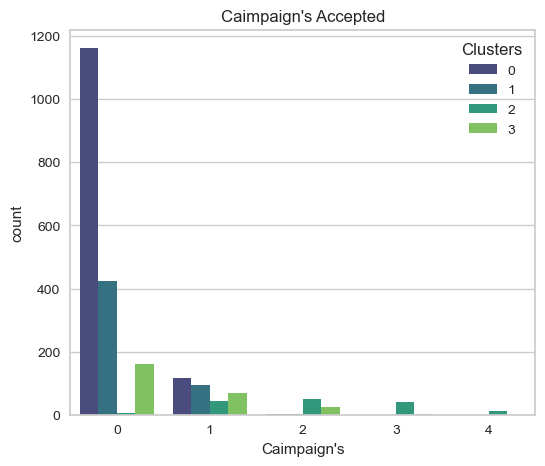

In [41]:
plt.figure(figsize=(6,5))
data['acceptedcmp_overall'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
sns.countplot(x=data['acceptedcmp_overall'], hue = data['Clusters'], palette='viridis')
plt.title("Caimpaign's Accepted")
plt.xlabel("Caimpaign's")
plt.show()

*The response to promotions is not favorable.*

<Figure size 1600x1600 with 0 Axes>

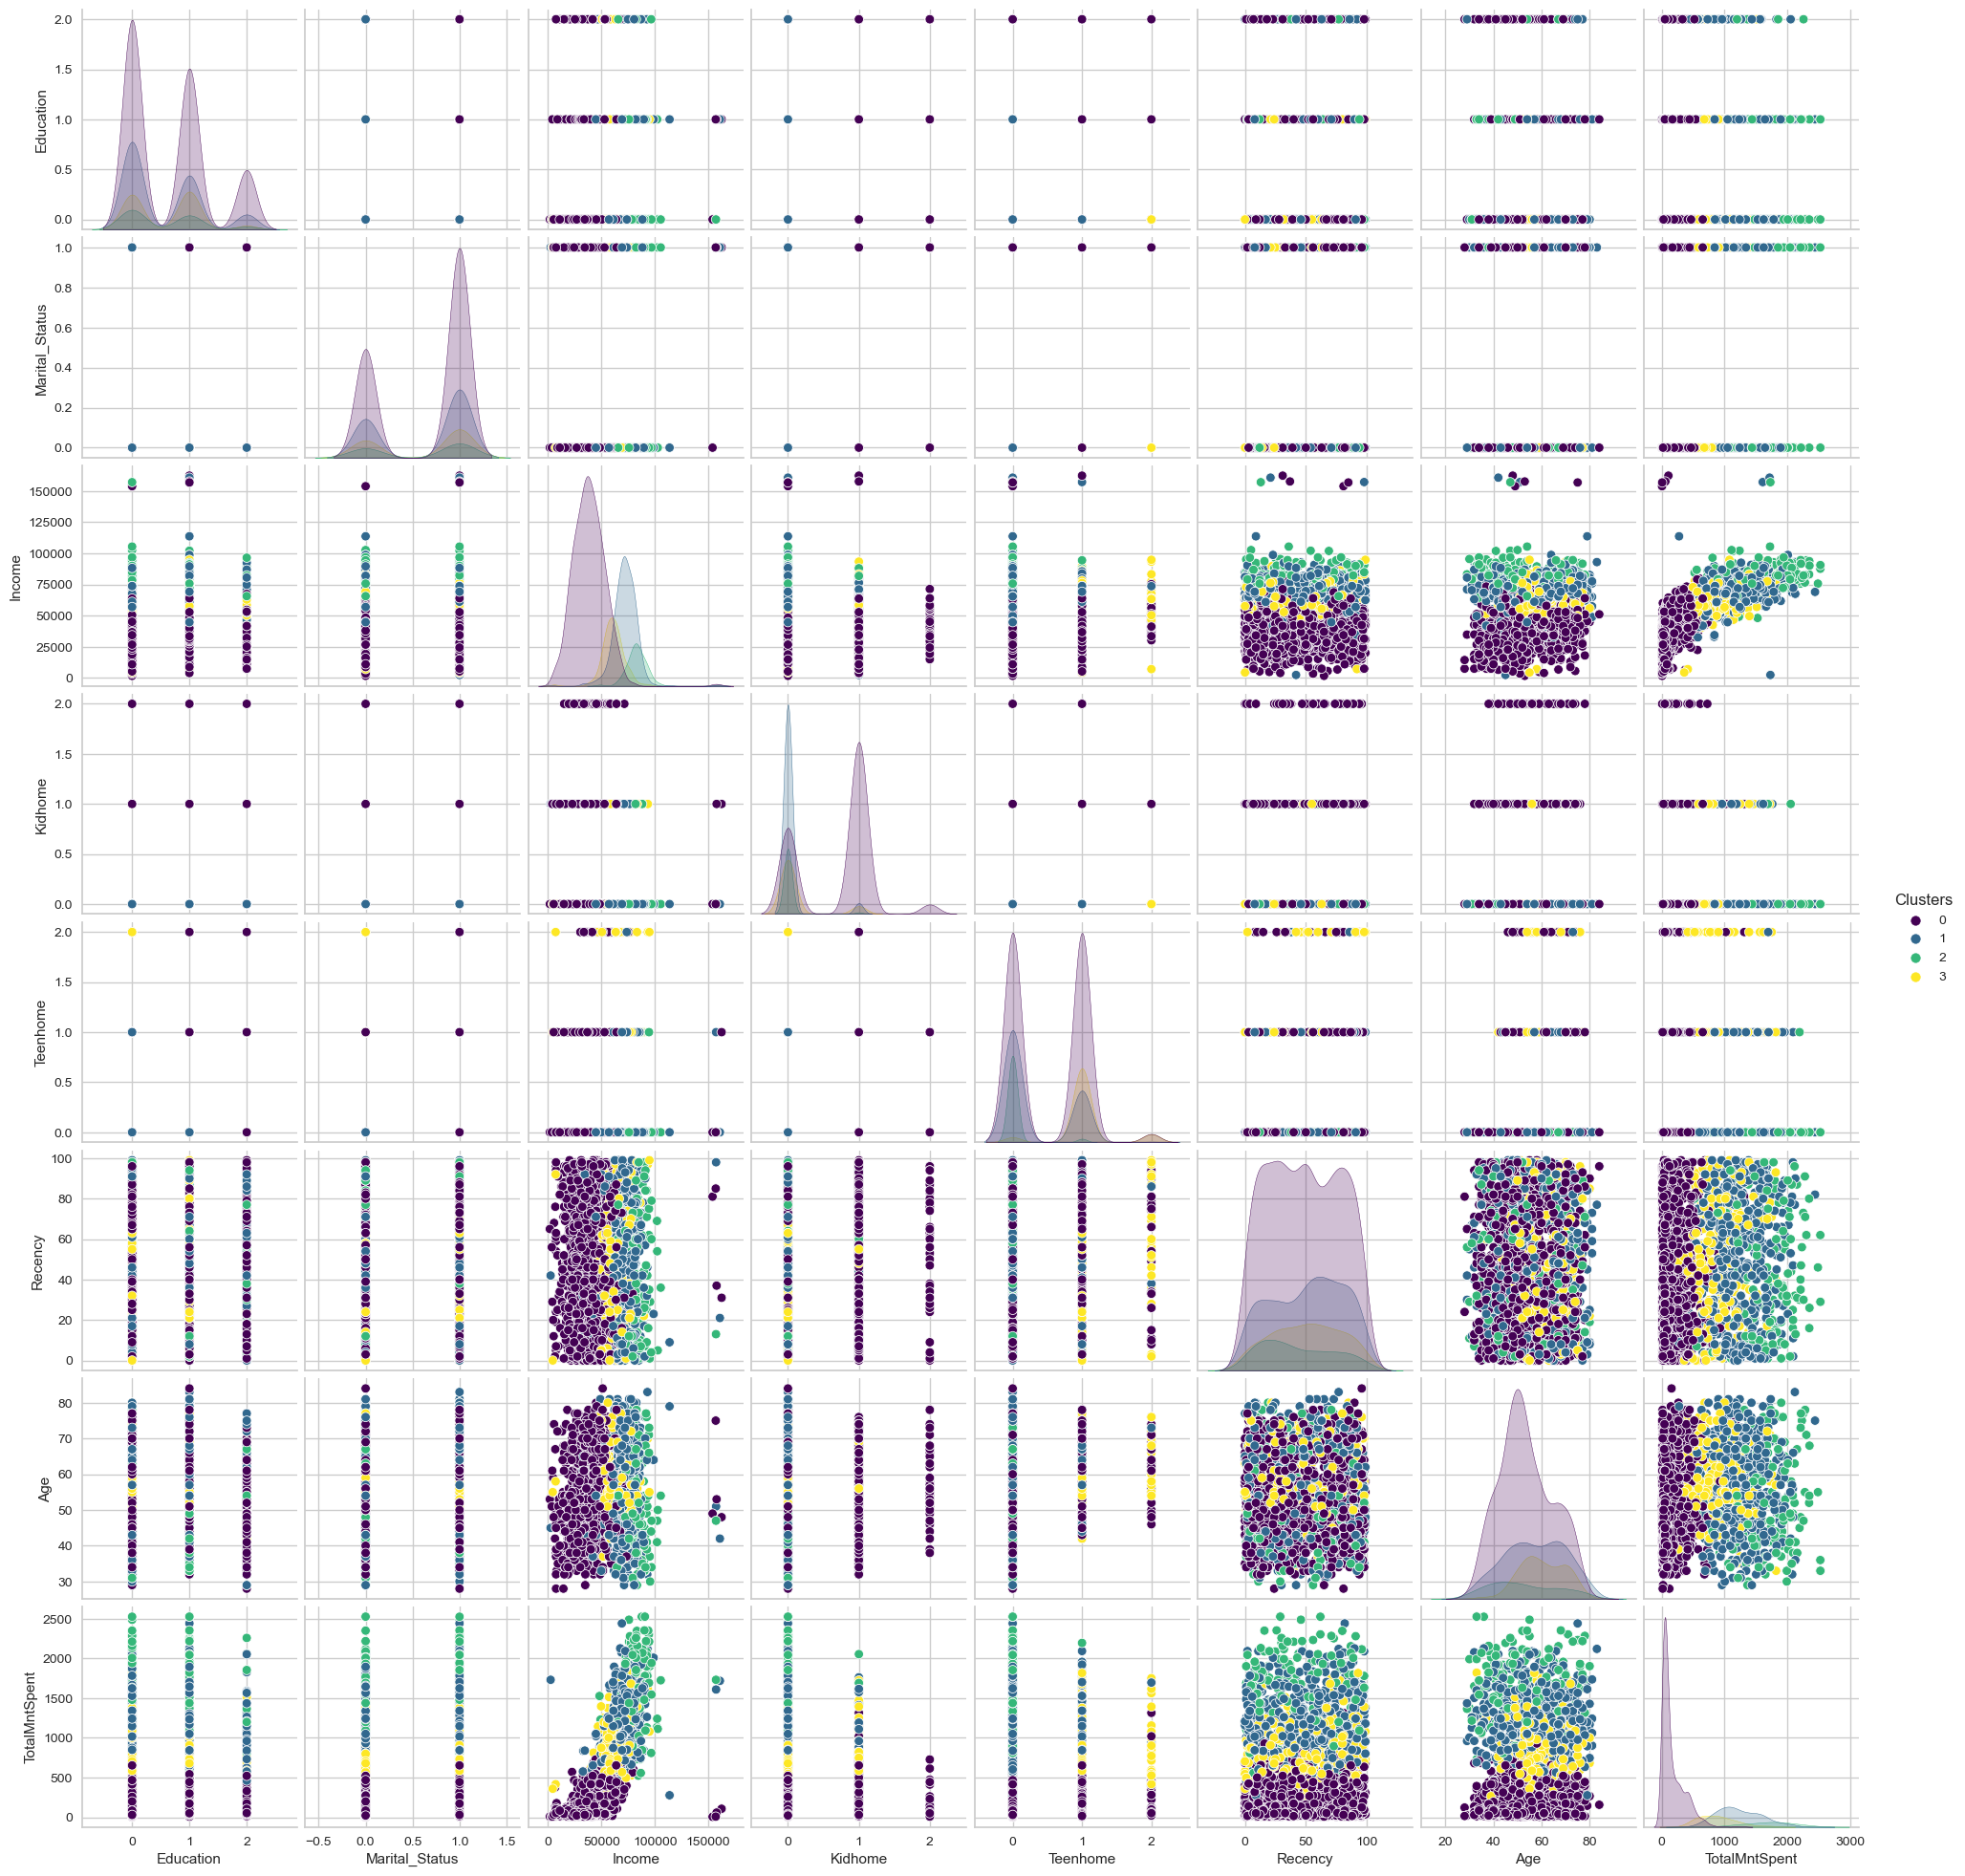

In [42]:
features = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'TotalMntSpent']
plt.figure(figsize=(16,16))
sns.pairplot(data=data, vars=features, hue='Clusters', palette='viridis')
plt.show()

# Conclusion


| Category         | Cluster 0                                                | Cluster 1                                                | Cluster 2                                                | Cluster 3                                                |
|------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|
| Education        | Predominantly undergraduates and high school graduates, smaller proportion of post-graduates | Higher proportion of graduates and post-graduates        | Diverse educational backgrounds, balanced distribution across levels | Predominantly individuals with lower educational attainment, such as high school graduates and undergraduates |
| Age              | Generally younger age demographics, significant presence below 40 years old | Skewed towards mature age demographics, particularly in the range of 40-60 years old | Golden Jubilee Customers | Varied age demographics, majority aged 41-75                |
| Age Groups      | Below 40 years old                                      | 40-60 years old                                          | 48-58  years old                                                  | 41-75 years old                                          |
| Income           | Moderate to low-income range, sizable portion below average income level | High-income earners, often exceeding average income level | Moderate to high-income range, considerable proportion within middle to upper-income brackets | Low to moderate-income range, often falling below average income level |
| Amount Spent     | Moderate spending habits across various product categories | Substantial spending in certain categories like wines and meats | Moderate spending patterns across various product categories, no significant extremes | Relatively conservative spending habits across all product categories, lower overall expenditure |
| Children         | Varied distribution, noticeable proportion with no children | Mostly having one child or no children, fewer instances of larger families | Mostly with one child                                        | No children                                               |
| Promotions       | Moderate response to promotions, tendency to engage in online purchases visits and a potential for optimization to increase engagement | Active engagement with promotional offers, particularly in deals purchases and potential for targeted marketing approaches| Moderate response to promotional activities, balanced engagement across channels. Opportunities for improvement in targeting and personalization | Moderate response to promotional offers, tendency towards traditional purchasing channels |
| Campaign Accepted | Not Favourable                                                     | Not Favourable                                                      | Not Favourable                                                       | Not Favourable                                                       |


**Based on the provided data, the segmentation led us to focus more on Cluster 1 customers. Here's the rationale:**

- Education: Cluster 1 has a higher proportion of graduates and post-graduates, indicating potentially higher purchasing power and sophistication in product selection.

- Age: Cluster 1 consists of mature age demographics, particularly in the range of 40-60 years old, suggesting a stable income and purchasing behavior.

- Income: Cluster 1 comprises high-income earners who often exceed the average income level, indicating greater spending capacity.

- Amount Spent: Customers in Cluster 1 exhibit substantial spending patterns, especially in categories like wines and meats, which can contribute significantly to sales revenue.

- Children: While there are fewer instances of larger families in Cluster 1, the presence of one child or no children suggests potential for discretionary spending on luxury or high-end products.

- Promotions: Cluster 1 demonstrates active engagement with promotional offers, particularly in deals purchases, indicating receptiveness to marketing initiatives.

    **Overall, targeting Cluster 1 customers would likely yield higher returns for the marketing strategies/Product Development/Market Expansion, given their higher income levels, spending habits, and responsiveness to promotions.**